# **Data Analysis**

In [1]:
#Setting the stage
#File path
data <- "/Users/patrickokwir/Desktop/Lighthouse-data-notes/Jack-Talk-Surveys/data_output/final_df_numeric.csv"

In [2]:
df <- read.csv(data)
head(df)

,id,Finished.x,RecordedDate.x,Q1_a,Q2_a,Q3_a,Q4_a,Pre,Finished.y,RecordedDate.y,Q1_b,Q2_b,Q3_b,Q4_b,Q5,Q6,Q7,Q8,Post,Matched
,<chr>,<lgl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,A_A_01_C,TRUE,2023-05-01 12:21:00,3,2,5,3,pre,TRUE,2023-05-01 13:02:00,3,4,4,4,6,7,7,10,post,matched
2,A_A_01_D,TRUE,2023-05-02 14:13:00,6,5,5,3,pre,TRUE,2023-05-02 14:58:00,6,5,4,4,5,4,5,7,post,matched
3,A_A_01_M,TRUE,2023-04-24 16:19:00,3,5,4,3,pre,TRUE,2023-04-24 17:01:00,5,5,4,4,5,4,5,7,post,matched
4,A_A_02_A,TRUE,2023-05-03 13:03:00,4,4,4,4,pre,TRUE,2023-05-03 14:18:00,6,6,5,3,6,6,7,10,post,matched
5,A_A_02_C,TRUE,2023-03-26 15:06:00,6,6,6,6,pre,TRUE,2023-03-26 15:55:00,6,6,6,6,6,6,6,10,post,matched
6,A_A_02_I,TRUE,2023-04-14 10:46:00,7,7,7,7,pre,TRUE,2023-04-14 10:51:00,7,7,7,7,7,6,7,8,post,matched


## **Quality Control Checks**

In [3]:
# check duplicates based on the 'id' column in df
duplicate_rows <- df[duplicated(df$id), ]

nrow(duplicate_rows)


[1] 0

In [4]:
library(dplyr)

# Arrange the data by 'id' and 'RecordedDate.y' in descending order
# Then, keep only the first occurrence of each unique 'id' and filter by RecordedDate.y >= RecordedDate.x
df <- df %>%
  arrange(id, desc(RecordedDate.y)) %>%
  group_by(id) %>%
  filter(RecordedDate.y >= RecordedDate.x) %>%
  slice_head(n = 1) %>%
  ungroup()

# Print the resulting data frame
head(df)
nrow(df)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




id,Finished.x,RecordedDate.x,Q1_a,Q2_a,Q3_a,Q4_a,Pre,Finished.y,RecordedDate.y,Q1_b,Q2_b,Q3_b,Q4_b,Q5,Q6,Q7,Q8,Post,Matched
<chr>,<lgl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
A_A_01_C,TRUE,2023-05-01 12:21:00,3,2,5,3,pre,TRUE,2023-05-01 13:02:00,3,4,4,4,6,7,7,10,post,matched
A_A_01_D,TRUE,2023-05-02 14:13:00,6,5,5,3,pre,TRUE,2023-05-02 14:58:00,6,5,4,4,5,4,5,7,post,matched
A_A_01_M,TRUE,2023-04-24 16:19:00,3,5,4,3,pre,TRUE,2023-04-24 17:01:00,5,5,4,4,5,4,5,7,post,matched
A_A_02_A,TRUE,2023-05-03 13:03:00,4,4,4,4,pre,TRUE,2023-05-03 14:18:00,6,6,5,3,6,6,7,10,post,matched
A_A_02_C,TRUE,2023-03-26 15:06:00,6,6,6,6,pre,TRUE,2023-03-26 15:55:00,6,6,6,6,6,6,6,10,post,matched
A_A_02_I,TRUE,2023-04-14 10:46:00,7,7,7,7,pre,TRUE,2023-04-14 10:51:00,7,7,7,7,7,6,7,8,post,matched


[1] 2325

## **5. Summarize the data for each of Q1-8 by reporting the mean response for each question. Please report the summary statistic for anyone who completed either the pre or post survey.**

`The requirement is to consider pre and post surveys separately when summarizing the mean responses for each question. This arises from the distinct nature of the pre and post survey data.`

`To perform this anlysis, I consider the original cleaned and non-duplicated pre and post survey data.`

In [5]:
pre <- "/Users/patrickokwir/Desktop/Lighthouse-data-notes/Jack-Talk-Surveys/data_output/df_pre.csv"
post <- "/Users/patrickokwir/Desktop/Lighthouse-data-notes/Jack-Talk-Surveys/data_output/df_post.csv"

df_pre <- read.csv(pre)
df_post <- read.csv(post)

In [6]:
library(dplyr)

# Define a function to map responses to numerical values
map_responses <- function(response) {
  # function to map responses to numerical values
  mapping <- c('Strongly disagree' = 1, # nolint
               'Disagree' = 2, # nolint
               'Somewhat disagree' = 3,
               'Neither agree nor disagree' = 4,
               'Somewhat agree' = 5,
               'Agree' = 6,
               'Strongly agree' = 7)
  return(mapping[response])
}

In [7]:
# Apply the mapping function to the specified columns in df_pre
df_pre <- df_pre %>%
  mutate(across(c(Q1_a,
                Q2_a,
                Q3_a,
                Q4_a),
                map_responses))

# Apply the mapping function to the specified columns in df_post
df_post <- df_post %>%
  mutate(across(c(Q1_b,
                Q2_b,
                Q3_b,
                Q4_b,
                Q5,
                Q6,
                Q7),
                map_responses))

In [8]:
library(dplyr)

# Calculate the mean response for each question separately
pre_survey_means <- df_pre %>%
  summarise(mean_Q1 = mean(Q1_a, na.rm = TRUE),
            mean_Q2 = mean(Q2_a, na.rm = TRUE),
            mean_Q3 = mean(Q3_a, na.rm = TRUE),
            mean_Q4 = mean(Q4_a, na.rm = TRUE))

post_survey_means <- df_post %>%
  summarise(mean_Q1 = mean(Q1_b, na.rm = TRUE),
            mean_Q2 = mean(Q2_b, na.rm = TRUE),
            mean_Q3 = mean(Q3_b, na.rm = TRUE),
            mean_Q4 = mean(Q4_b, na.rm = TRUE),
            mean_Q5 = mean(Q5, na.rm = TRUE),
            mean_Q6 = mean(Q6, na.rm = TRUE),
            mean_Q7 = mean(Q7, na.rm = TRUE),
            mean_Q8 = mean(Q8, na.rm = TRUE))

pre_survey_means
post_survey_means

mean_Q1,mean_Q2,mean_Q3,mean_Q4
<dbl>,<dbl>,<dbl>,<dbl>
5.013998,4.332652,5.04687,4.699906


mean_Q1,mean_Q2,mean_Q3,mean_Q4,mean_Q5,mean_Q6,mean_Q7,mean_Q8
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.229696,4.681339,5.234346,5.035338,5.107254,5.110043,4.980161,6.946683


In [9]:
round(pre_survey_means[1,3],2)

[1] 5.05

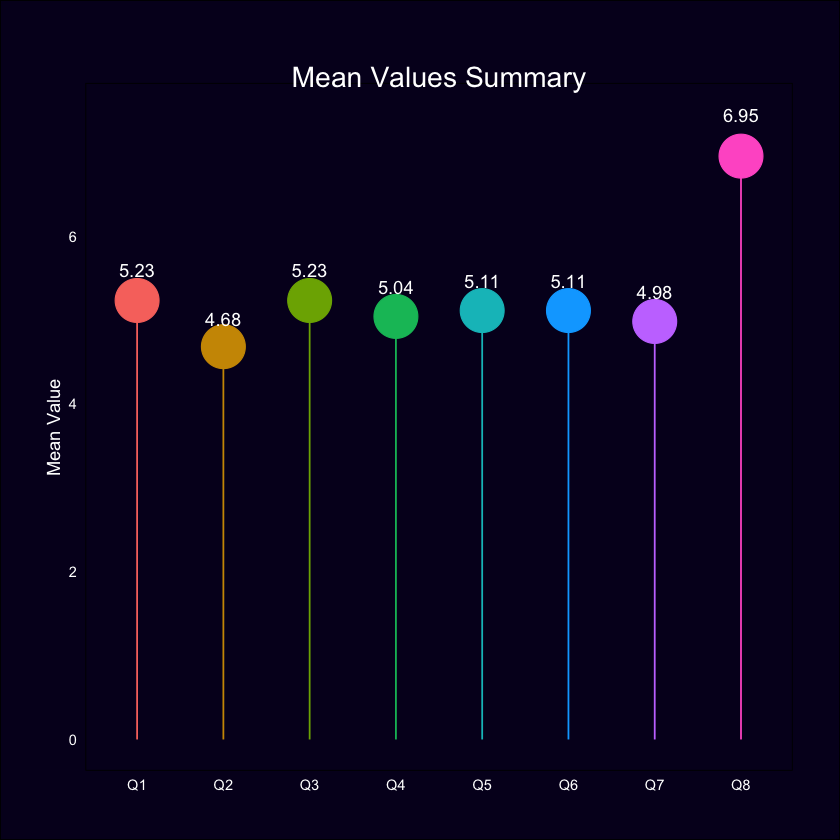

In [10]:
# Load the necessary library
library(ggplot2)

# data
data_means <- data.frame(
  question = c("Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8"),
  mean_value = c(round(post_survey_means[1,1], 2), 
                  round(post_survey_means[1,2], 2), 
                  round(post_survey_means[1,3], 2), 
                  round(post_survey_means[1,4], 2), 
                  round(post_survey_means[1,5], 2), 
                  round(post_survey_means[1,6], 2), 
                  round(post_survey_means[1,7], 2), 
                  round(post_survey_means[1,8], 2))
)

ggplot(data_means, aes(x = question, y = mean_value, fill = question)) +
  geom_col(width = 0.000, aes(color = factor(question))) + geom_point(size =12, aes(color = factor(question))) +
  geom_text(aes(label = mean_value), position = position_stack(vjust = 1.07), color = "white") +
  scale_fill_manual(values = rep(c("#0cb9f8", "#04d6b3", "#ee7503", "#a295eb"), times = nrow(data_means))) +
  theme_minimal() +
  theme(plot.background = element_rect(fill = "#050022"),plot.margin = unit(c(1, 1, 1, 1), "cm"),
        panel.background = element_rect(fill = "#050022"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "white"),
        axis.line.y = element_blank(),
        axis.line.x = element_blank(),
        axis.text = element_text(color = "white"),
        axis.title = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "none", 
        axis.title.y = element_text(color = "white"), 
        plot.title = element_text(color = "white", size = 17, lineheight = 5, vjust = -2, hjust = 0.5)) +
  labs(title = "Mean Values Summary",
       y = "Mean Value") +
  ylim(c(0, max(data_means$mean_value) + 0.5))
  # +ggsave("/Users/patrickokwir/Desktop/Lighthouse-data-notes/Jack-Talk-Surveys/assets/post_mean.png", width = 8, height = 6, units = "in")

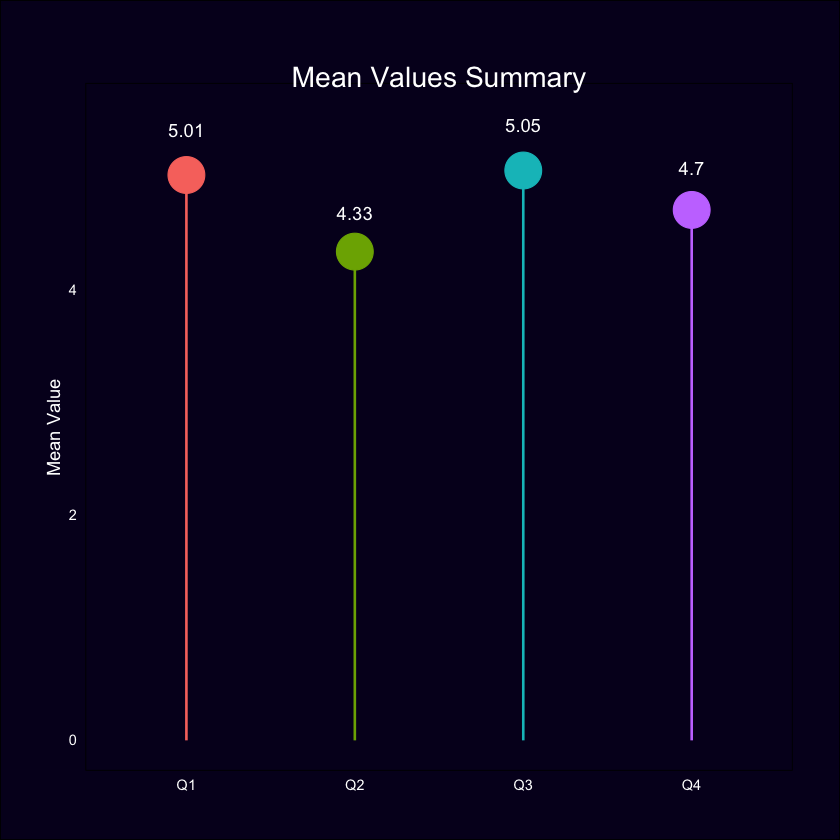

In [11]:
# plot data for pre survey
#plot pre results 

# Load the necessary library
library(ggplot2)

# data
data_means <- data.frame(
  question = c("Q1", "Q2", "Q3", "Q4"),
  mean_value = c(round(pre_survey_means[1,1],2), round(pre_survey_means[1,2],2), round(pre_survey_means[1,3],2), round(pre_survey_means[1,4],2))
)

ggplot(data_means, aes(x = question, y = mean_value, fill = question)) +
  geom_col(width = 0.005, aes(color = factor(question))) + geom_point(size =10, aes(color = factor(question))) +
  geom_text(aes(label = round(mean_value, 2)), position = position_stack(vjust = 1.08), color = "white") +
  scale_fill_manual(values = rep(c("#0cb9f8", "#04d6b3", "#ee7503", "#a295eb" ), times = nrow(data_means))) +
  theme_minimal() +
  theme(plot.background = element_rect(fill = "#050022"),plot.margin = unit(c(1, 1, 1, 1), "cm"),
        panel.background = element_rect(fill = "#050022"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "white"),
        axis.line.y = element_blank(),
        axis.line.x = element_blank(),
        axis.text = element_text(color = "white"),
        axis.title = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "none",
        axis.title.y = element_text(color = "white"), 
        plot.title = element_text(color = "white", size = 17, lineheight = 5, vjust = -2, hjust = 0.5)) +
  labs(title = "Mean Values Summary",
       y = "Mean Value") +
  ylim(c(0, max(data_means$mean_value) + 0.5))
  #+ ggsave("/Users/patrickokwir/Desktop/Lighthouse-data-notes/Jack-Talk-Surveys/assets/pre_mean.png", width = 8, height = 6, units = "in")



In [12]:
# Combine pre and post survey means
combined_means <- bind_rows(
  mutate(pre_survey_means, Survey = "Pre"),
  mutate(post_survey_means, Survey = "Post")
)
combined_means

mean_Q1,mean_Q2,mean_Q3,mean_Q4,Survey,mean_Q5,mean_Q6,mean_Q7,mean_Q8
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
5.013998,4.332652,5.046870,4.699906,Pre,NA,NA,NA,NA
5.229696,4.681339,5.234346,5.035338,Post,5.107254,5.110043,4.980161,6.946683


In [13]:
qn_5 <- combined_means
qn_5

mean_Q1,mean_Q2,mean_Q3,mean_Q4,Survey,mean_Q5,mean_Q6,mean_Q7,mean_Q8
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
5.013998,4.332652,5.046870,4.699906,Pre,NA,NA,NA,NA
5.229696,4.681339,5.234346,5.035338,Post,5.107254,5.110043,4.980161,6.946683


In [14]:
# write df to csv
write.csv(combined_means, "/Users/patrickokwir/Desktop/Lighthouse-data-notes/Jack-Talk-Surveys/data_output/qn_5.csv", row.names = FALSE)

## **6. For individuals with both a pre and post response, compare the individual average change between the pre and post survey for each of Q1-4. Quantify the individual average change and report whether the difference between means is statistically significant.**

The dataset used for this analysis is the combined, cleaned, unduplicated pre and post dataset. 

To test for significance, I used the **Wilcoxon signed-rank test.**

**The Wilcoxon signed-rank test is a non-parametric statistical test that is appropriate for comparing paired data when the distribution of the data may not be normal or when the assumptions of parametric tests like the t-test are not met. In this case, we are comparing the individual average change between the pre and post surveys for each question (Q1-4). Here are the reasons why the Wilcoxon signed-rank test is a suitable choice:**

- Paired Data: The Wilcoxon signed-rank test is designed for paired data, where each individual has two related measurements
- Non-Normal Distribution: If the data distribution is not normal, the Wilcoxon signed-rank test provides meaningful results.
- Ordinal Data: Our data has ordinal response categories (Likert scale), the Wilcoxon test is appropriate because it does not require interval-level data.
- Sensitive to Shifts: The Wilcoxon signed-rank test is sensitive to detecting shifts in the distribution, making it suitable for detecting changes in responses.

In [15]:
head(df)

id,Finished.x,RecordedDate.x,Q1_a,Q2_a,Q3_a,Q4_a,Pre,Finished.y,RecordedDate.y,Q1_b,Q2_b,Q3_b,Q4_b,Q5,Q6,Q7,Q8,Post,Matched
<chr>,<lgl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
A_A_01_C,TRUE,2023-05-01 12:21:00,3,2,5,3,pre,TRUE,2023-05-01 13:02:00,3,4,4,4,6,7,7,10,post,matched
A_A_01_D,TRUE,2023-05-02 14:13:00,6,5,5,3,pre,TRUE,2023-05-02 14:58:00,6,5,4,4,5,4,5,7,post,matched
A_A_01_M,TRUE,2023-04-24 16:19:00,3,5,4,3,pre,TRUE,2023-04-24 17:01:00,5,5,4,4,5,4,5,7,post,matched
A_A_02_A,TRUE,2023-05-03 13:03:00,4,4,4,4,pre,TRUE,2023-05-03 14:18:00,6,6,5,3,6,6,7,10,post,matched
A_A_02_C,TRUE,2023-03-26 15:06:00,6,6,6,6,pre,TRUE,2023-03-26 15:55:00,6,6,6,6,6,6,6,10,post,matched
A_A_02_I,TRUE,2023-04-14 10:46:00,7,7,7,7,pre,TRUE,2023-04-14 10:51:00,7,7,7,7,7,6,7,8,post,matched


In [16]:
library(dplyr)
library(stats)

# Filter rows where both pre and post surveys were completed
completed_both <- df %>%
  filter(Pre == 'pre', Post == 'post') %>%
  select(matches("^Q[1-4]"), starts_with("id"))

# Calculate the average change for each participant
completed_both <- completed_both %>%
  mutate(avg_change_Q1 = Q1_b - Q1_a,
         avg_change_Q2 = Q2_b - Q2_a,
         avg_change_Q3 = Q3_b - Q3_a,
         avg_change_Q4 = Q4_b - Q4_a)

# Perform Wilcoxon signed-rank test for each question
result_summary <- completed_both %>%
  summarise(mean_change_Q1 = mean(avg_change_Q1),
            mean_change_Q2 = mean(avg_change_Q2),
            mean_change_Q3 = mean(avg_change_Q3),
            mean_change_Q4 = mean(avg_change_Q4),
            wilcox_Q1 = wilcox.test(avg_change_Q1)$p.value,
            wilcox_Q2 = wilcox.test(avg_change_Q2)$p.value,
            wilcox_Q3 = wilcox.test(avg_change_Q3)$p.value,
            wilcox_Q4 = wilcox.test(avg_change_Q4)$p.value)

# Print the summary of Wilcoxon signed-rank test results
result_summary


mean_change_Q1,mean_change_Q2,mean_change_Q3,mean_change_Q4,wilcox_Q1,wilcox_Q2,wilcox_Q3,wilcox_Q4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.07053763,0.2305376,0.1221505,0.3195699,0.001272983,3.802891e-23,2.457798e-08,1.39444e-45


In [17]:
qn_6 <- result_summary
qn_6 # round to 2 decimal places

mean_change_Q1,mean_change_Q2,mean_change_Q3,mean_change_Q4,wilcox_Q1,wilcox_Q2,wilcox_Q3,wilcox_Q4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.07053763,0.2305376,0.1221505,0.3195699,0.001272983,3.802891e-23,2.457798e-08,1.39444e-45


In [18]:
# write df to csv
write.csv(qn_6, "/Users/patrickokwir/Desktop/Lighthouse-data-notes/Jack-Talk-Surveys/data_output/qn_6.csv", row.names = FALSE)

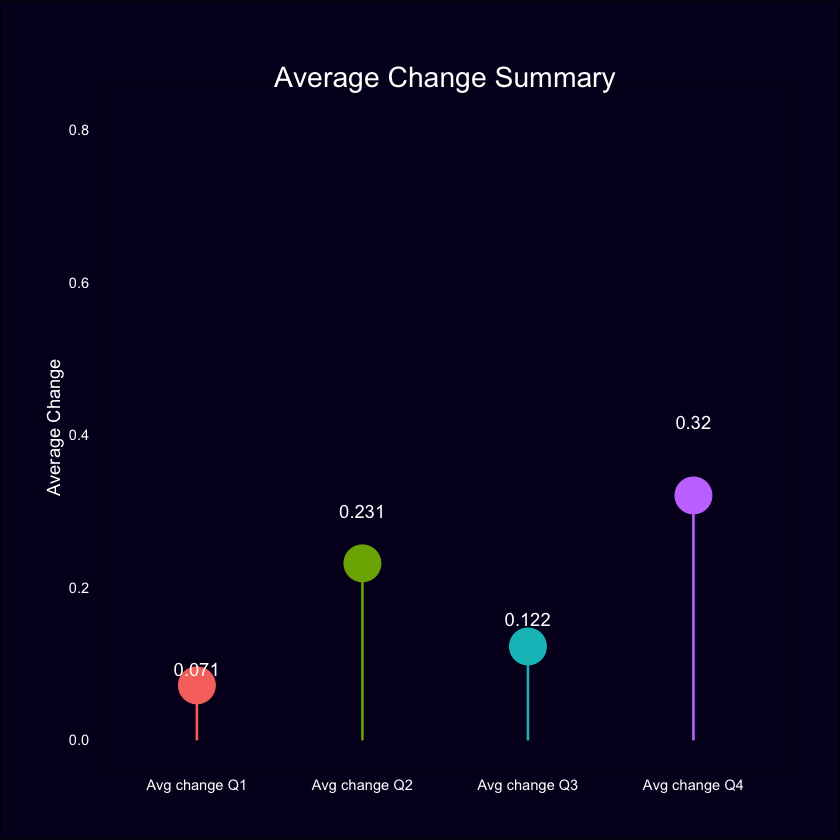

In [19]:
#plot the results

# Load the necessary library
library(ggplot2)

# data
data_means <- data.frame(
  question = c("Avg change Q1", "Avg change Q2", "Avg change Q3", "Avg change Q4"),
  mean_value = c(round(result_summary$mean_change_Q1, 3), 
                  round(result_summary$mean_change_Q2, 3), 
                  round(result_summary$mean_change_Q3, 3), 
                  round(result_summary$mean_change_Q4, 3))
)

ggplot(data_means, aes(x = question, y = mean_value, fill = question)) +
  geom_col(width = 0.005, aes(color = factor(question))) + geom_point(size =10, aes(color = factor(question))) +
  geom_text(aes(label = mean_value), position = position_stack(vjust = 1.3), color = "white") +
  scale_fill_manual(values = rep(c("#0cb9f8", "#04d6b3", "#ee7503", "#a295eb"), times = nrow(data_means))) +
  theme_minimal() +
  theme(plot.background = element_rect(fill = "#050022"),plot.margin = unit(c(1, 1, 1, 1), "cm"),
        panel.background = element_rect(fill = "#050022"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(color = "white"),
        axis.line.y = element_blank(),
        axis.line.x = element_blank(),
        axis.text = element_text(color = "white"),
        axis.title = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "none", 
        axis.title.y = element_text(color = "white"),
        plot.title = element_text(color = "white", size = 17, lineheight = 5, vjust = -2, hjust = 0.5)) +
  labs(title = "Average Change Summary",
       y = "Average Change") +
  ylim(c(0, max(data_means$mean_value) + 0.5))
  #+ggsave("/Users/patrickokwir/Desktop/Lighthouse-data-notes/Jack-Talk-Surveys/assets/pre_post_change.png", width = 8, height = 6, units = "in")

`Overall, there are statistically significant differences between the average change in responses for each question between the pre and post surveys. The small p-values suggest that these differences are not likely due to random chance and that there is a meaningful change in responses.`

`participants' responses have shown positive significant changes between the pre and post surveys for all four questions (Q1, Q2, Q3, and Q4). Q4 has the highest change in responses and the smallest p-value.`

In [20]:
df_final <- df

library(MASS)
library(dplyr)

#polr requires the dependent variable to be a factor
df_final$Q8 <- as.factor(df_final$Q8)

# Calculate average change for each question
df_final$avg_change_Q1 <- df_final$Q1_b - df_final$Q1_a
df_final$avg_change_Q2 <- df_final$Q2_b - df_final$Q2_a
df_final$avg_change_Q3 <- df_final$Q3_b - df_final$Q3_a
df_final$avg_change_Q4 <- df_final$Q4_b - df_final$Q4_a

# Fit the ordinal regression model
model <- polr(Q8 ~ avg_change_Q1 + avg_change_Q2 + avg_change_Q3 + avg_change_Q4 + Q5 + Q6 + Q7, data = df_final, method = "logistic")

# Print the model summary
print(model)



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Call:
polr(formula = Q8 ~ avg_change_Q1 + avg_change_Q2 + avg_change_Q3 + 
    avg_change_Q4 + Q5 + Q6 + Q7, data = df_final, method = "logistic")

Coefficients:
avg_change_Q1 avg_change_Q2 avg_change_Q3 avg_change_Q4            Q5 
 -0.024325011   0.008223761   0.006952743  -0.016423999   0.260370215 
           Q6            Q7 
  0.330539940   0.622831711 

Intercepts:
     0|1      1|2      2|3      3|4      4|5      5|6      6|7      7|8 
1.416855 1.695719 2.141843 2.557531 3.054574 4.833245 5.438886 6.552497 
     8|9     9|10 
7.738843 8.508471 

Residual Deviance: 8277.745 
AIC: 8311.745 


`Coefficients: These are the estimated coefficients for each predictor variable in the model.`

`avg_change_Q1, avg_change_Q2, avg_change_Q3, and avg_change_Q4: These are the coefficients associated with the average change in Q1, Q2, Q3, and Q4, respectively. The negative sign for avg_change_Q1 and avg_change_Q4 suggests that an increase in the average change of these questions is associated with a lower likelihood of a higher response in Q8 (ordinal response).`

`Q5, Q6, and Q7: These coefficients are associated with the predictor variables Q5, Q6, and Q7. For example, a positive coefficient for Q5 suggests that a higher value in Q7 is associated with a higher likelihood of a higher response in Q8.`